In [36]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy as sp
import cv2 as cv

In [37]:
df= pd.read_csv("combined_Rosi.csv",index_col=False)
df

,Title,Culture,Dynasty,Date,Period,Material,object_Type,Path
0,RC-1 - Sekhmet Statue,Egyptian,NaN,332-30 BCE,Ptolemaic,Bronze,Sculpture,789.jpg
1,RC-2 - Harpocrates,Egyptian,NaN,305 - 30 BCE,Ptolemaic,Bronze,Sculpture,931.jpg
2,RC-3 - Osiris,Egyptian,NaN,332 - 31 BCE,Ptolemaic,Bronze,Sculpture,365.jpg
3,RC-4 - Khonsu,Egyptian,NaN,332 - 30 BCE,Ptolemaic,Bronze,Sculpture,774.jpg
4,RC-5 - Apis Bull,Egyptian,NaN,525 - 343 BCE,Late Period,Bronze,Sculpture,913.jpg
...,...,...,...,...,...,...,...,...
819,RC-297 - Ptah,Egyptian,NaN,NaN,NaN,Bronze,Sculpture,221.jpg
820,RC-251 - Rameses Ii Cartouche Fragment,Egyptian,NaN,NaN,NaN,Granite,Epigraphy,64.jpg
821,RC-1727 - False Door with Ibis,Egyptian,NaN,NaN,NaN,Limestone,Funerary,536.jpg
822,RC-5187 - Scarab,Egyptian,13TH,1784-1668 BCE,2nd Intermediate,Faience,Amulets,863.jpg


## Reorder the rows to correspond to images order

In [38]:
df['path_num']= df['Path'].apply(lambda x : int(x[:-4]))  ### get images number 
df.sort_values(by='path_num',ignore_index=True,inplace=True)# sort based on image number
df

,Title,Culture,Dynasty,Date,Period,Material,object_Type,Path,path_num
0,RC-176 - Jar,Egyptian,NaN,3500-3000 BCE,NaN,Clay,Vessels,1.jpg,1
1,RC-613 - Coffin Panel,Egyptian,NaN,NaN,NaN,Wood,Funerary,2.jpg,2
2,RC-1173 - Boat Model,Egyptian,NaN,NaN,NaN,Wood,Sculpture,3.jpg,3
3,RC-2986 - Cleopatra Vii Coin,Egyptian,NaN,51 - 30 BCE,Ptolemaic,NaN,Coins,5.jpg,5
4,RC-2861 - Brick,Mesopotamian,NaN,NaN,NaN,Glazed Clay,Babylonian,7.jpg,7
...,...,...,...,...,...,...,...,...,...
819,RC-2292 - Orbiculus,Egyptian,NaN,NaN,Coptic/Byzantine,Linen,Textiles,1029.jpg,1029
820,RC-1773 - Wesekh Collar,Egyptian,21 - 25TH,Saite Period,3rd Intermediate,Faience,Jewelry,1030.jpg,1030
821,RC-28 - Crocodile Lamp,Egyptian,NaN,31 BCE - 395 CE,Ptolemaic-Roman,Bronze,Lamps,1031.jpg,1031
822,RC-2221 - Hathor Aegis,Egyptian,NaN,767-525 BCE,Late Period,Bronze,Sculpture,1035.jpg,1035


# fix this dupliacted image 

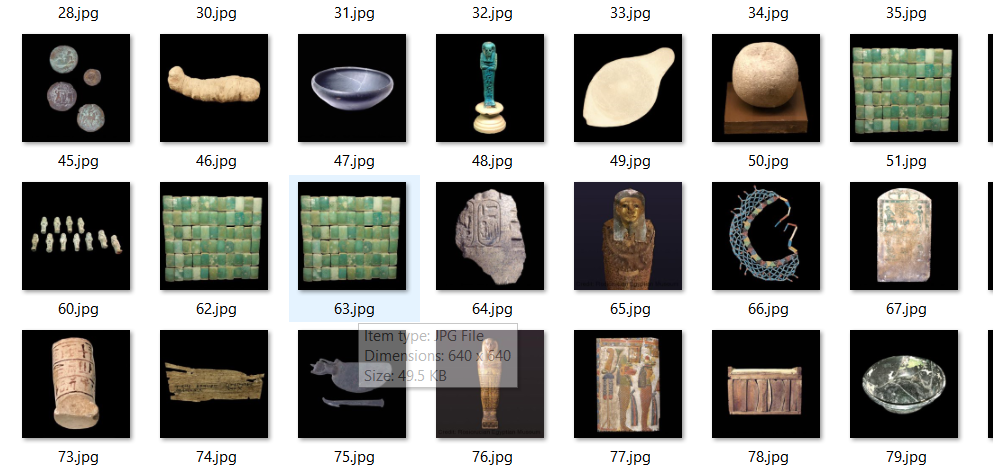

In [39]:
df['check_tile'] = df['Title'].apply(lambda x: x[-4:])
value_to_drop = 'Tile'

df = df[df['check_tile'] != value_to_drop]

df

,Title,Culture,Dynasty,Date,Period,Material,object_Type,Path,path_num,check_tile
0,RC-176 - Jar,Egyptian,NaN,3500-3000 BCE,NaN,Clay,Vessels,1.jpg,1,Jar
1,RC-613 - Coffin Panel,Egyptian,NaN,NaN,NaN,Wood,Funerary,2.jpg,2,anel
2,RC-1173 - Boat Model,Egyptian,NaN,NaN,NaN,Wood,Sculpture,3.jpg,3,odel
3,RC-2986 - Cleopatra Vii Coin,Egyptian,NaN,51 - 30 BCE,Ptolemaic,NaN,Coins,5.jpg,5,Coin
4,RC-2861 - Brick,Mesopotamian,NaN,NaN,NaN,Glazed Clay,Babylonian,7.jpg,7,rick
...,...,...,...,...,...,...,...,...,...,...
819,RC-2292 - Orbiculus,Egyptian,NaN,NaN,Coptic/Byzantine,Linen,Textiles,1029.jpg,1029,ulus
820,RC-1773 - Wesekh Collar,Egyptian,21 - 25TH,Saite Period,3rd Intermediate,Faience,Jewelry,1030.jpg,1030,llar
821,RC-28 - Crocodile Lamp,Egyptian,NaN,31 BCE - 395 CE,Ptolemaic-Roman,Bronze,Lamps,1031.jpg,1031,Lamp
822,RC-2221 - Hathor Aegis,Egyptian,NaN,767-525 BCE,Late Period,Bronze,Sculpture,1035.jpg,1035,egis


In [40]:
df = df.drop(['check_tile'],axis=1)
df.reset_index(drop=True)

,Title,Culture,Dynasty,Date,Period,Material,object_Type,Path,path_num
0,RC-176 - Jar,Egyptian,NaN,3500-3000 BCE,NaN,Clay,Vessels,1.jpg,1
1,RC-613 - Coffin Panel,Egyptian,NaN,NaN,NaN,Wood,Funerary,2.jpg,2
2,RC-1173 - Boat Model,Egyptian,NaN,NaN,NaN,Wood,Sculpture,3.jpg,3
3,RC-2986 - Cleopatra Vii Coin,Egyptian,NaN,51 - 30 BCE,Ptolemaic,NaN,Coins,5.jpg,5
4,RC-2861 - Brick,Mesopotamian,NaN,NaN,NaN,Glazed Clay,Babylonian,7.jpg,7
...,...,...,...,...,...,...,...,...,...
755,RC-2292 - Orbiculus,Egyptian,NaN,NaN,Coptic/Byzantine,Linen,Textiles,1029.jpg,1029
756,RC-1773 - Wesekh Collar,Egyptian,21 - 25TH,Saite Period,3rd Intermediate,Faience,Jewelry,1030.jpg,1030
757,RC-28 - Crocodile Lamp,Egyptian,NaN,31 BCE - 395 CE,Ptolemaic-Roman,Bronze,Lamps,1031.jpg,1031
758,RC-2221 - Hathor Aegis,Egyptian,NaN,767-525 BCE,Late Period,Bronze,Sculpture,1035.jpg,1035


6.233333333333333


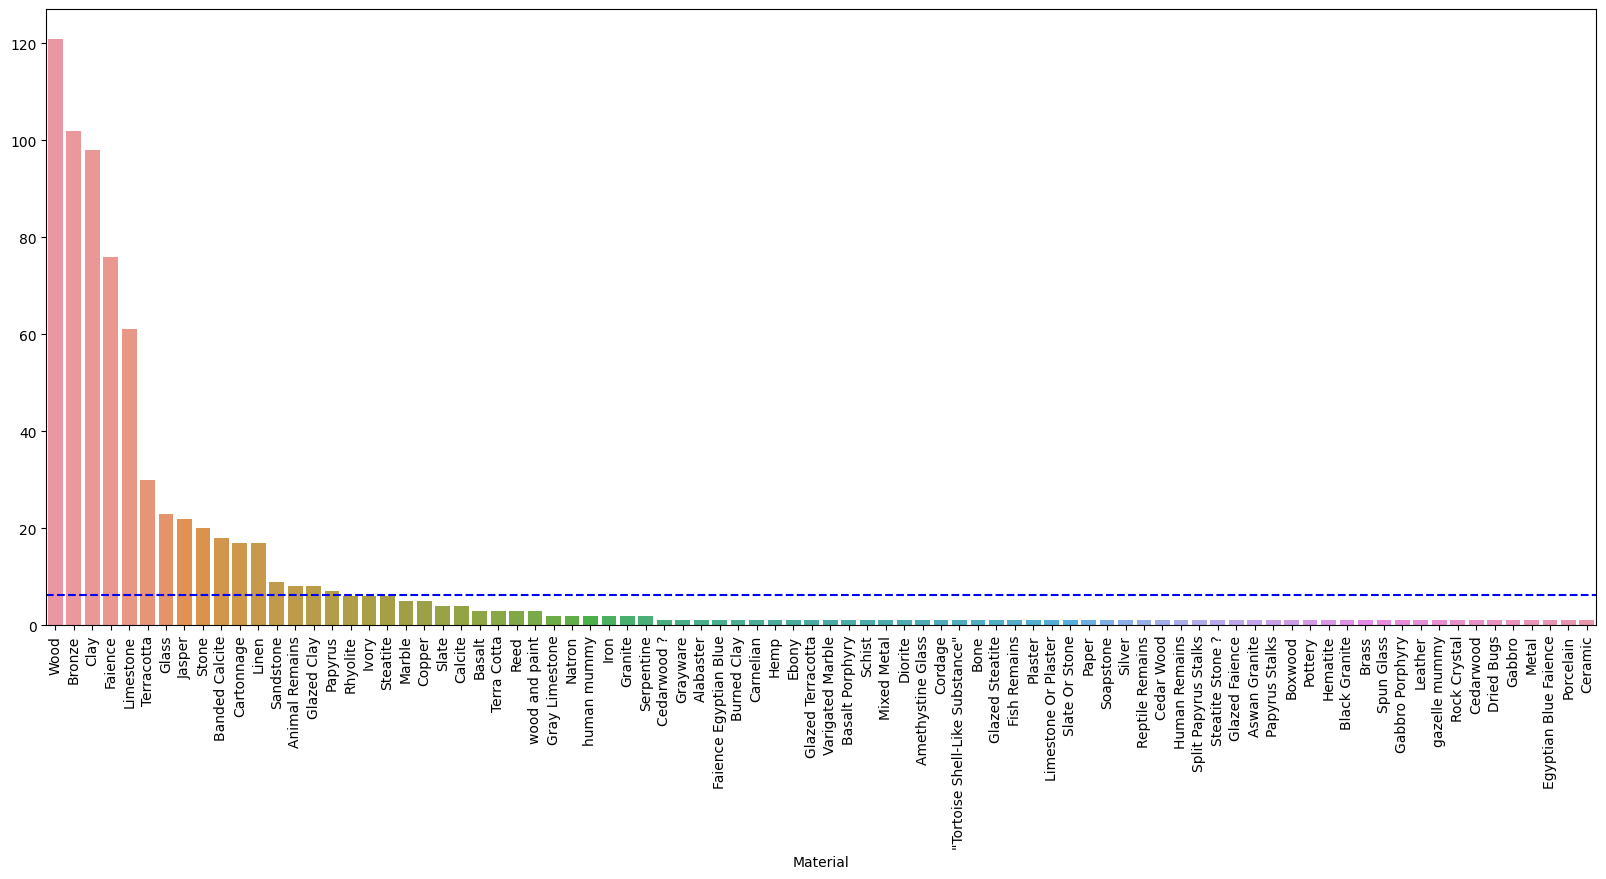

In [41]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sn.barplot(x=df['Material'].value_counts().index, y=df['Material'].value_counts().values, errorbar='sd')
plt.axhline(y=df['Material'].value_counts().values.mean()*0.7, color='blue', linestyle='--', label='Mean')
print(df['Material'].value_counts().values.mean()*0.7)

20.944


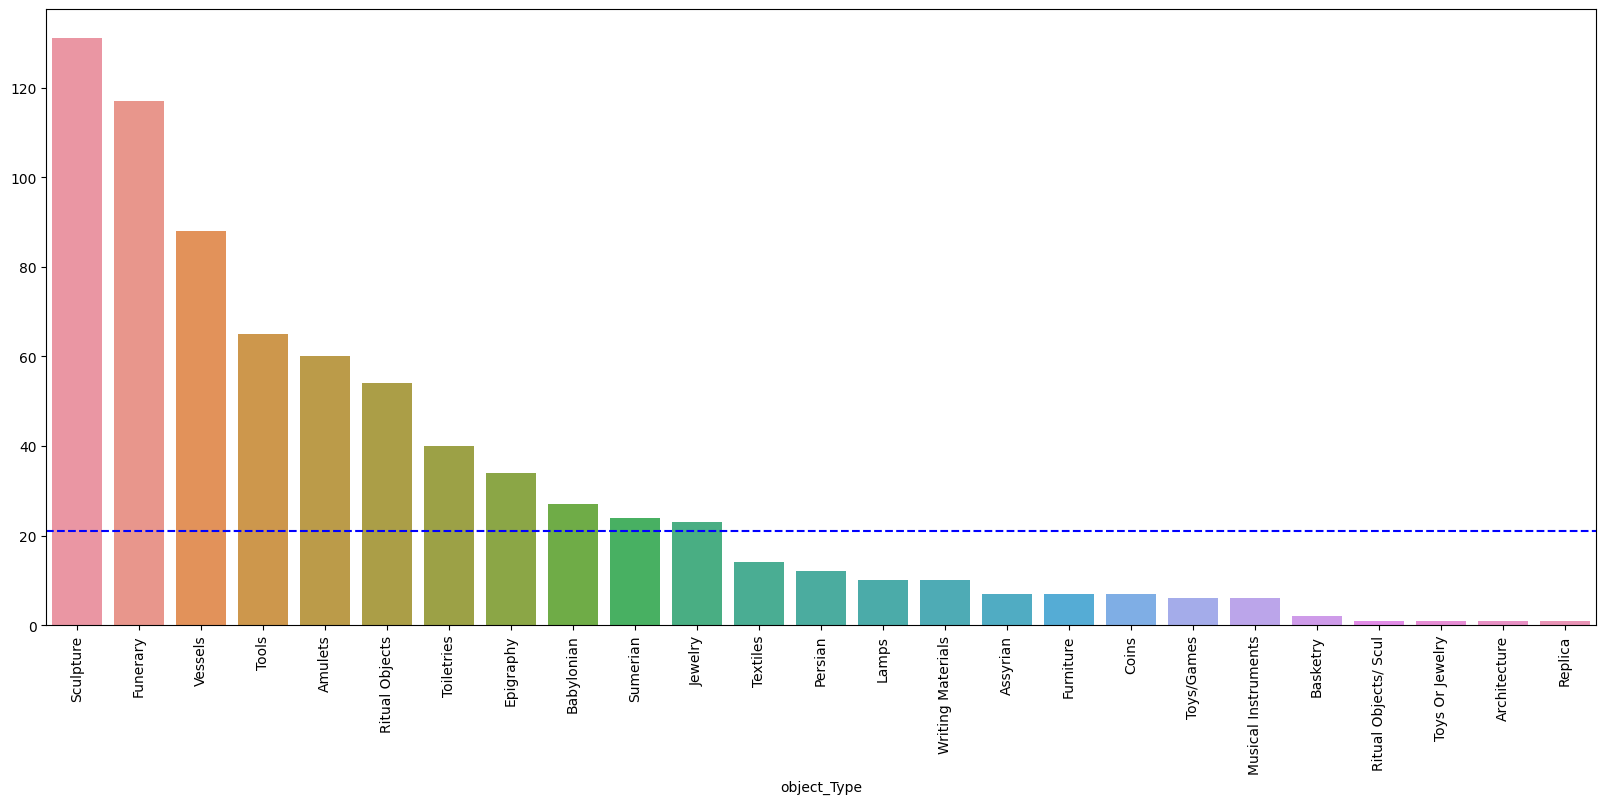

In [42]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sn.barplot(x=df['object_Type'].value_counts().index, y=df['object_Type'].value_counts().values, errorbar='sd')
plt.axhline(y=df['object_Type'].value_counts().values.mean()*0.7, color='blue', linestyle='--', label='Mean')
print(df['object_Type'].value_counts().values.mean()*0.7)

## Select certain material only

In [43]:
# List of values to keep
calsses_to_keep = list(df['Material'].value_counts()[0:5].index)

df = df[df['Material'].isin(calsses_to_keep)]
df

,Title,Culture,Dynasty,Date,Period,Material,object_Type,Path,path_num
0,RC-176 - Jar,Egyptian,NaN,3500-3000 BCE,NaN,Clay,Vessels,1.jpg,1
1,RC-613 - Coffin Panel,Egyptian,NaN,NaN,NaN,Wood,Funerary,2.jpg,2
2,RC-1173 - Boat Model,Egyptian,NaN,NaN,NaN,Wood,Sculpture,3.jpg,3
6,RC-310 - Contract Tablet,Mesopotamian,NaN,2112 - 2004 BCE,Sumerian,Clay,Sumerian,9.jpg,9
8,RC-1767 - Mask/ Coffin Fragment,Egyptian,20TH,1185-1070 BCE,New Kingdom,Wood,Funerary,11.jpg,11
...,...,...,...,...,...,...,...,...,...
814,RC-2199 - Situlae,Egyptian,22ND,332 BCE - 395 CE,Greco-Roman,Bronze,Vessels,1024.jpg,1024
815,RC-2246 - Stele,Egyptian,NaN,31 BCE - 395 CE,Late Roman,Limestone,Funerary,1025.jpg,1025
820,RC-1773 - Wesekh Collar,Egyptian,21 - 25TH,Saite Period,3rd Intermediate,Faience,Jewelry,1030.jpg,1030
821,RC-28 - Crocodile Lamp,Egyptian,NaN,31 BCE - 395 CE,Ptolemaic-Roman,Bronze,Lamps,1031.jpg,1031


#### I will be working with material for this probkem 

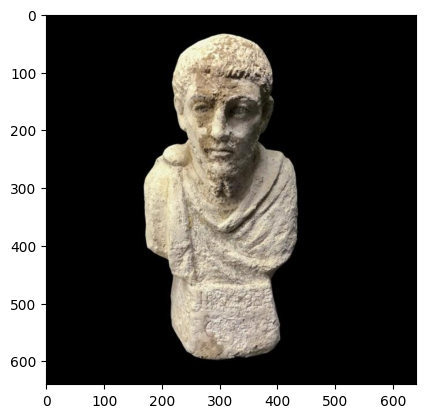

In [44]:

img = cv.cvtColor(cv.imread("photo/22.jpg"), cv.COLOR_BGR2RGB)
# Convert image to float
img_float = img.astype(np.float32) / 255.0

plt.imshow(img_float)

In [45]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame

# Split the DataFrame into training and validation sets with stratified sampling
train_df, valid_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df['Material'])

# Display the number of samples in the training and validation sets
print("Number of samples in training set:", len(train_df))
print("Number of samples in validation set:", len(valid_df))


Number of samples in training set: 389
Number of samples in validation set: 69


In [46]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# Define a function to convert an RGB image to grayscale
def rgb_to_grayscale(image):
    return tf.image.rgb_to_grayscale(image)


# Directory containing images
dataset_dir = "photo"

# Convert the 'Material' column to strings
train_df['Material'] = train_df['Material'].astype(str)
valid_df['Material'] = valid_df['Material'].astype(str)

# Data augmentation with grayscale conversion
datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.3,
    # horizontal_flip=True,
    # vertical_flip=True,
    # rotation_range=180,
    # preprocessing_function=rgb_to_grayscale  # Apply grayscale conversion
)

# Training data generator
train_generator = datagen.flow_from_dataframe(
    train_df,
    directory=dataset_dir,
    x_col='Path',
    y_col='Material',
    target_size=(640, 640),
    batch_size=32,
    class_mode='categorical',  # Or 'sparse' or 'raw' depending on your task
    shuffle=False
)

# Validation data generator
valid_generator = datagen.flow_from_dataframe(
    valid_df,
    directory=dataset_dir,
    x_col='Path',
    y_col='Material',
    target_size=(640, 640),
    batch_size=32,
    class_mode='categorical',  # Or 'sparse' or 'raw' depending on your task
    shuffle=False
)


Found 389 validated image filenames belonging to 5 classes.
Found 69 validated image filenames belonging to 5 classes.


In [47]:
# Generate augmented images
augmented_images, labels = next(train_generator)

In [48]:
labels.shape

(32, 5)

In [49]:
def get_class(label):

    calss_indices = dict(map(reversed, train_generator.class_indices.items()))

    return calss_indices[np.argmax(label)]



get_class(labels[1])

'Limestone'

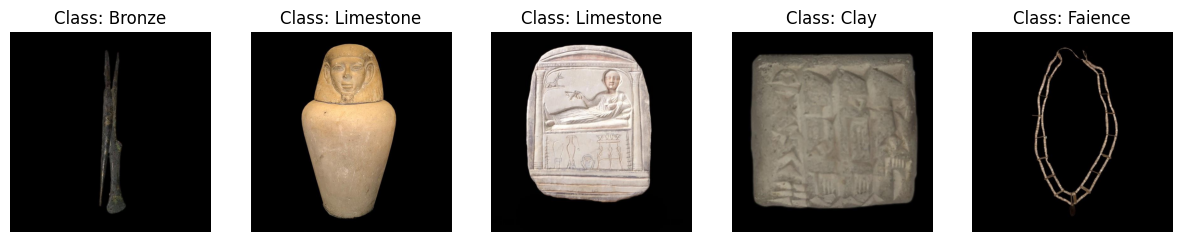

In [50]:
import matplotlib.pyplot as plt


# Display a few augmented images
num_images_to_display = min(len(augmented_images), 5)

plt.figure(figsize=(15, 3 * num_images_to_display))

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f"Class: {get_class(labels[i])}")
    plt.axis('off')

plt.show()

In [51]:
augmented_images[0].shape

(640, 640, 3)

## Time for Creating our awsome NN

In [52]:
from keras.models import Sequential
from keras.layers import Flatten, Dense,Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

num_classes = len(train_generator.class_indices)

model = Sequential()

# Flatten layer to flatten the input images
model.add(Flatten(input_shape=(640, 640, 3)))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Use the EarlyStopping callback in the fit method
history = model.fit(train_generator, epochs=100, validation_data=valid_generator, callbacks=[early_stopping])


Epoch 1/100
13/13 [==============================] - 235s 17s/step - loss: 1.8617 - accuracy: 0.2237 - val_loss: 2.2155 - val_accuracy: 0.3188
Epoch 2/100
13/13 [==============================] - 224s 15s/step - loss: 1.6742 - accuracy: 0.2674 - val_loss: 1.8272 - val_accuracy: 0.3333
Epoch 3/100
13/13 [==============================] - 283s 20s/step - loss: 1.6114 - accuracy: 0.3059 - val_loss: 1.9483 - val_accuracy: 0.2464
Epoch 4/100
13/13 [==============================] - 261s 20s/step - loss: 1.6177 - accuracy: 0.3188 - val_loss: 1.6943 - val_accuracy: 0.2319
Epoch 5/100
13/13 [==============================] - 251s 17s/step - loss: 1.5625 - accuracy: 0.3111 - val_loss: 1.5955 - val_accuracy: 0.2899
Epoch 6/100
13/13 [==============================] - 256s 18s/step - loss: 1.5065 - accuracy: 0.3496 - val_loss: 1.5623 - val_accuracy: 0.2899
Epoch 7/100
13/13 [==============================] - 276s 18s/step - loss: 1.4326 - accuracy: 0.3548 - val_loss: 1.5165 - val_accuracy: 0.3913

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1228800)           0         
                                                                 
 dense_4 (Dense)             (None, 64)                78643264  
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
# Evaluate the model
evaluation = model.evaluate(valid_generator)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

3/3 [==============================] - 1s 226ms/step - loss: 1.3389 - accuracy: 0.4783
Validation Loss: 1.3388656377792358
Validation Accuracy: 0.47826087474823


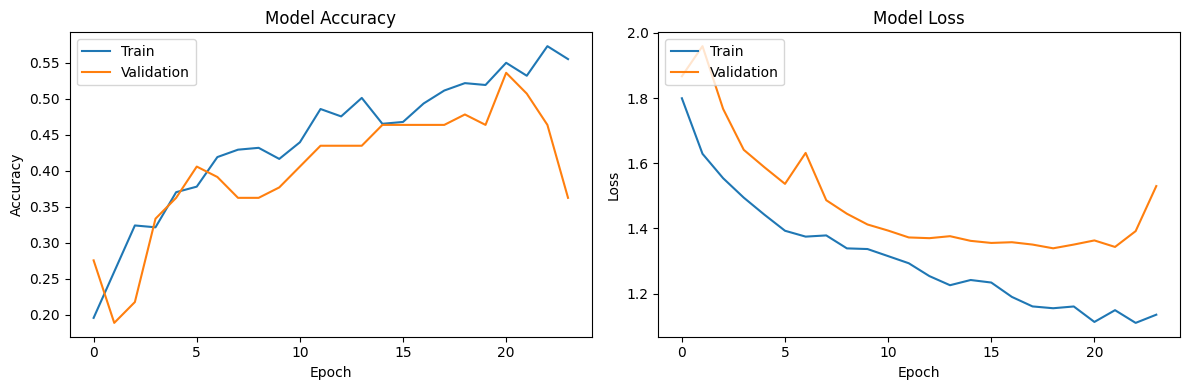

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


3/3 [==============================] - 1s 239ms/step


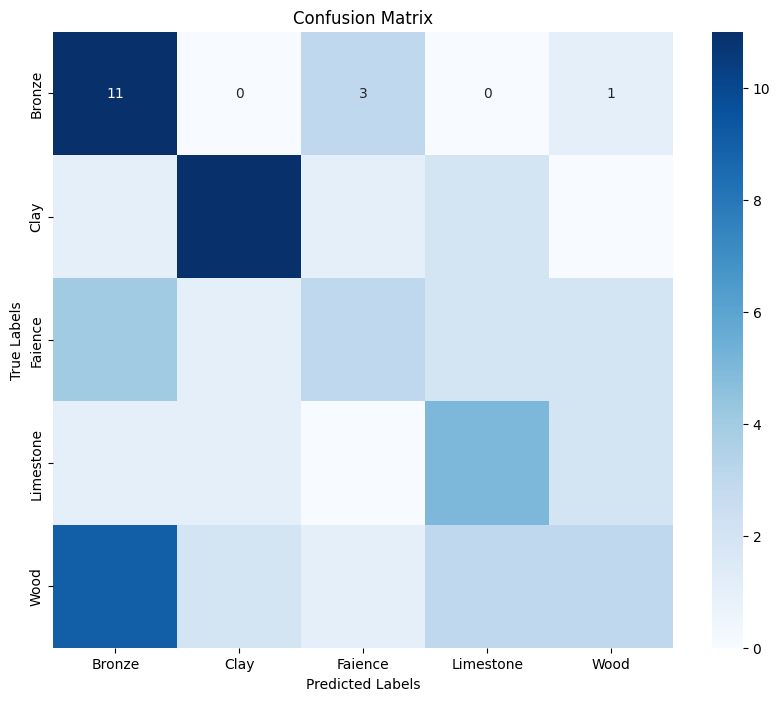

Classification Report:
               precision    recall  f1-score   support

      Bronze       0.42      0.73      0.54        15
        Clay       0.73      0.73      0.73        15
     Faience       0.38      0.25      0.30        12
   Limestone       0.42      0.56      0.48         9
        Wood       0.38      0.17      0.23        18

    accuracy                           0.48        69
   macro avg       0.46      0.49      0.46        69
weighted avg       0.47      0.48      0.45        69



In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have the model predictions in 'y_pred' and true labels in 'y_true'
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = valid_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
class_report = classification_report(y_true, y_pred_classes, target_names=valid_generator.class_indices.keys())
print("Classification Report:\n", class_report)


In [ ]:
from keras.preprocessing import image

def plot_cam(image_path, model, last_conv_layer_name):
    img = image.load_img(image_path, target_size=(640, 640))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]

    last_conv_layer = model.get_layer(last_conv_layer_name)
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([img_array])

    for i in range(last_conv_layer.output_shape[3]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    plt.imshow(heatmap)
    plt.show()


In [152]:
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# num_classes = len(generator.class_indices)

# # Define the neural network model
# model = Sequential()

# # Convolutional layers
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(640, 640, 3)))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# # Flatten layer
# model.add(Flatten())

# # Dense layers
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model using the data generators
# history = model.fit( train_generator, epochs=10, validation_data=valid_generator, batch_size= 128)

In [153]:
# Evaluate the model
evaluation = model.evaluate(valid_generator)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

1/1 [==============================] - 0s 119ms/step - loss: 1.6835 - accuracy: 0.4286
Validation Loss: 1.6835033893585205
Validation Accuracy: 0.4285714328289032
